<div class="list-group" id="list-tab" role="tablist">

## TABLE OF CONTENTS

- <a href='#1'>1. DESCRIPTIVE STATISTICS</a>
    - <a href='#1-1'>1.1 Types of Data</a>
    - <a href='#1-2'>1.2 Levels of Measurement</a>
    - <a href='#1-3'>1.3 Categorical Variables. Visualization techniques.</a>
    - <a href='#1-4'>1.4 Numerical Variables. Visualization techniques.</a>
    - <a href='#1-5'>1.5 Cross table and scatter plot</a>
    - <a href='#1-6'>1.6 Measures of Central Tendency</a>
        - <a href='#1-6-1'>1.6.1 Mean</a>
        - <a href='#1-6-2'>1.6.2 Median</a>
        - <a href='#1-6-3'>1.6.3 Mode</a>
    - <a href='#1-7'>1.7 Measure of Symmetry</a>
        - <a href='#1-7-1'>1.7.1 Skewness</a>
    - <a href='#1-8'>1.8 Measures of Dispersion</a>
        - <a href='#1-8-1'>1.8.1 Variance</a>
        - <a href='#1-8-2'>1.8.2 Standard deviation</a>
        - <a href='#1-8-3'>1.8.3 Coefficient of Variation </a>
    - <a href='#1-9'>1.9 Measures of Position</a>
        - <a href='#1-9-1'>1.9.1 Quantiles and Percentile rank </a>
        - <a href='#1-9-2'>1.9.2 Outliers and Boxplots </a>
    - <a href='#1-10'>1.10 Measures of Relations between variables</a>
        - <a href='#1-10-1'>1.10.1 Covariance</a>
        - <a href='#1-11-1'>1.11.1 Correlation</a>
- <a href='#2'>2. INFERENTIAL STATISTICS</a>
    - <a href='#2-1'>2.1 Permutations</a>
</div>

<div style="color:white; background-color:  #008075; padding: 14px;">
<center>
<b>
DESCRIPTIVE STATISTICS </b>
</center>
</div>

Descriptive statistics consists of methods for organizing, displaying and describing data by using tables, graphs and summary measures.

## 1.1 Types of Data

![types data](Types_of_Data.png)

[(source)](https://medium.com/analytics-vidhya/types-scales-of-data-in-descriptive-statistics-d3aa439c0b1e)

## 1.2 Levels of Measurement

![types data](Scales_of_measurement.png)

[(source)](https://medium.com/@shivanimandeliya/descriptive-statistics-data-types-6f4a6821600)

![types data](Scales_measurement_explained.png)

![types data](Scales_measurement2_explained.png)

[(source)](https://careerfoundry.com/en/blog/data-analytics/data-levels-of-measurement/)

## 1.3 Categorical Variables. Visualization techniques.

**Representation of Categorical Variables**
1. **Frequency distribution tables**
2. **Bar charts**
3. **Pie charts**
4. **Pareto diagrams**: A Pareto diagram is a type of chart that combines both bar and line graphs. It is named after Vilfredo Pareto, an Italian economist, who observed that roughly 80% of the effects come from 20% of the causes. The Pareto diagram helps visualize the most important factors in a dataset by presenting them in descending order of importance.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Example 1 Create a DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C', 'A', 'B', 'C'],
        'Value': [10, 20, 15, 25, 12, 18, 30, 22, 17, 28]}
df = pd.DataFrame(data)

# Example 2
data_2 = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
    'Frequency': [30, 20, 15, 10, 5]
}

df_2 = pd.DataFrame(data_2)

Frequency Table 1: 
           Frequency
Category           
A                 4
B                 3
C                 3


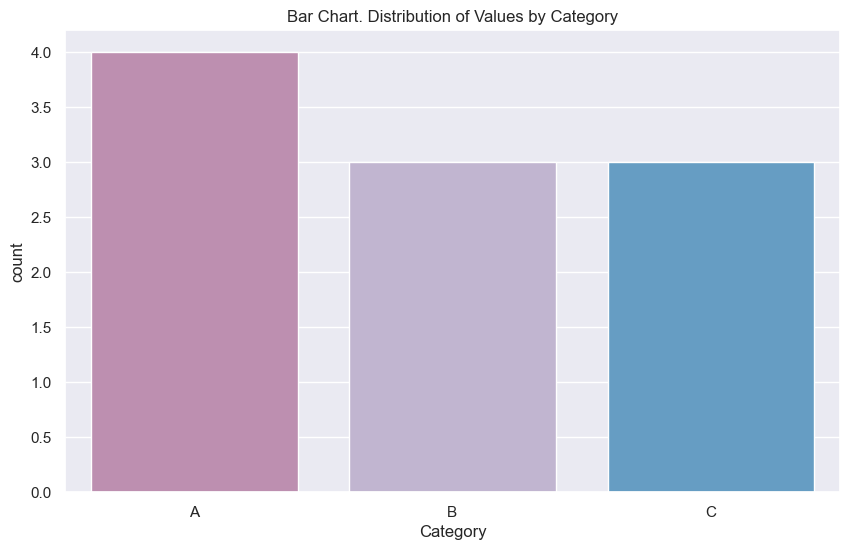

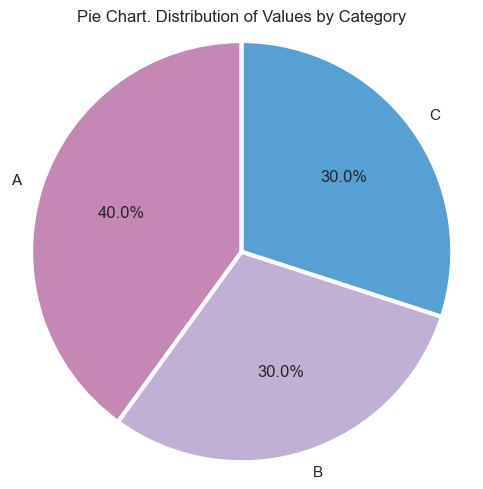

Frequency Table 2: 
     Categories  Frequency
0  Category A         30
1  Category B         20
2  Category C         15
3  Category D         10
4  Category E          5


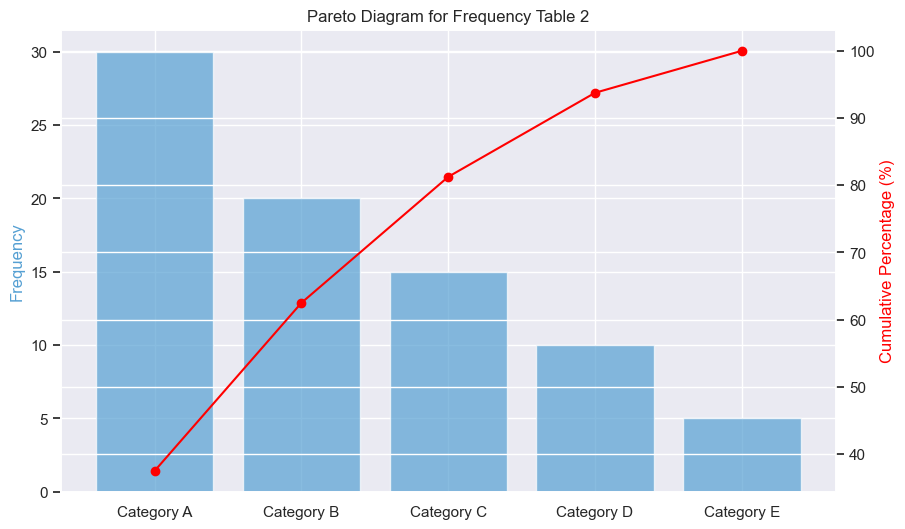

In [7]:
# ----------------------------------------------------------------
# 1. Frequency distribution table
# ----------------------------------------------------------------

# Assuming 'Category' is the name of your categorical column
# Create a frequency table
frequency_table = pd.crosstab(index=df['Category'], columns='Count')
frequency_table.columns = ['Frequency']
print('Frequency Table 1: \n', frequency_table)

# ----------------------------------------------------------------
# 2. Bar chart
# ----------------------------------------------------------------

# Assuming 'category_column' is the name of your categorical column
sns.set(style="darkgrid")

# Set different colors for each category
color_palette = {'A': '#c587b3', 'B': '#c1b0d5', 'C': '#56a0d3'}

plt.figure(figsize=(10, 6))
sns.countplot(x='Category',
              data=df,
              order=df['Category'].value_counts().index,
              palette = color_palette)

plt.title('Bar Chart. Distribution of Values by Category')

plt.show()

# ----------------------------------------------------------------
# 3. Pie chart
# ----------------------------------------------------------------

frequency_table_numeric = frequency_table.apply(pd.to_numeric, errors='coerce')
# Sum the values for each category
category_sums = frequency_table.sum(axis=1)

fig, ax = plt.subplots(figsize = (5,5))
pcts = ax.pie(category_sums,
              labels = category_sums.index,
              autopct = '%1.1f%%',
              colors = ['#c587b3', '#c1b0d5', '#56a0d3'],
              wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},    # <------------- Style the wedges
              startangle = 90)

plt.title('Pie Chart. Distribution of Values by Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()        # <------------- Adjust subplot spacing

# Display the chart
plt.show()

# ----------------------------------------------------------------
# 4. Pareto diagram
# ----------------------------------------------------------------

print('Frequency Table 2: \n ', df_2)

# Sort the DataFrame by frequency in descending order
df_2 = df_2.sort_values(by='Frequency', ascending=False)

# Calculate cumulative percentage
df_2['Cumulative Percentage'] = df_2['Frequency'].cumsum() / df_2['Frequency'].sum() * 100

# Create Pareto chart
fig, ax1 = plt.subplots(figsize = (10,6))

# Bar plot for frequencies
ax1.bar(df_2['Categories'], df_2['Frequency'], color='#56a0d3', alpha=0.7)

# Line plot for cumulative percentage on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df_2['Categories'], df_2['Cumulative Percentage'], color='red', marker='o')

# Set labels and title
ax1.set_ylabel('Frequency', color='#56a0d3')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
plt.title('Pareto Diagram for Frequency Table 2')

# Display the plot
plt.show()

## 1.4 Numerical Variables. Visualization techniques.

**Representation of Numerical Variables**
1. **Frequency distribution tables** with intervals
2. **Histogram**

In [8]:
# Sample dataset
data = {'Dataset': [1, 9, 22, 24, 32, 41, 44, 48, 57, 66, 70, 73, 75, 76, 79, 82, 87, 89, 95, 100]}
df = pd.DataFrame(data)

Frequency distribution table with intervals: 
          Interval  Absolute_Freq  Relative_Freq
0  (-0.001, 20.0]              2           0.10
1    (20.0, 40.0]              3           0.15
2    (40.0, 60.0]              4           0.20
3    (60.0, 80.0]              6           0.30
4   (80.0, 100.0]              5           0.25


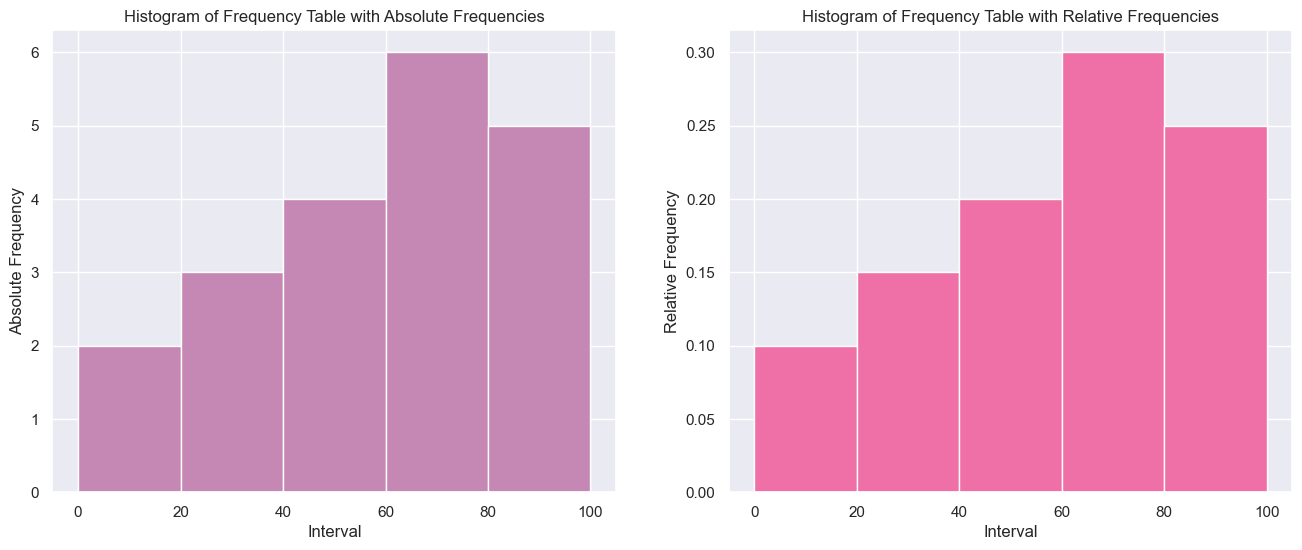

In [9]:
# ----------------------------------------------------------------
# 1. Frequency distribution table
# ----------------------------------------------------------------
# Desired intervals:  5
# Interval width:    20 ---> (largest_number - smallest_number)/ number_of_desired_intervals = round(19.8) = 20

# Define the bin edges
bins = range(0, 101, 20)

# Create frequency table with intervals
frequency_table = pd.cut(df['Dataset'], bins=bins, include_lowest=True).value_counts().sort_index().reset_index()
frequency_table.columns = ['Interval', 'Absolute_Freq']

frequency_table['Relative_Freq'] = frequency_table['Absolute_Freq']/len(data['Dataset'])

# Print the frequency table
print('Frequency distribution table with intervals: \n', frequency_table)


# ----------------------------------------------------------------
# 2. Histogram
# ----------------------------------------------------------------
# Extract midpoints of intervals and frequencies
midpoints = frequency_table['Interval'].apply(lambda interval: interval.mid)            # interval.mid is used to get the midpoint of each interval
frequencies = frequency_table['Absolute_Freq']
rel_frequencies = frequency_table['Relative_Freq']

# Plot histogram
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 6))
ax[0].bar(midpoints,
          frequencies,
          width=20,
          edgecolor='white',
          color='#c587b3')

# Add labels and title
ax[0].set_xlabel('Interval')
ax[0].set_ylabel('Absolute Frequency')
ax[0].set_title('Histogram of Frequency Table with Absolute Frequencies')

ax[1].bar(midpoints,
          rel_frequencies,
          width=20,
          edgecolor='white',
          color='#ee70a6')

# Add labels and title
ax[1].set_xlabel('Interval')
ax[1].set_ylabel('Relative Frequency')
ax[1].set_title('Histogram of Frequency Table with Relative Frequencies')

# Show the plot
plt.show()

## 1.5 Cross table and scatter plot

**Categorical Variables**
- **Contingency tables**: also known as a cross-tabulation or a two-way table, is a tabular arrangement of categorical data. It is used to summarize and analyze the relationship between two categorical variables. Each cell in the table represents the frequency or count of occurrences for a specific combination of the two variables.
Example:
![types data](contingency_table_example.png)


In [10]:
# Example 1:
# Create a sample DataFrame
data = {'Person': range(1, 11),
        'City': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
        'Transportation': ['Car', 'Bus', 'Bike', 'Car', 'Bus', 'Car', 'Bike', 'Bus', 'Car', 'Bike']}
df = pd.DataFrame(data)

Contingency Table: 
 Transportation  Bike  Bus  Car
City                          
A                  2    1    2
B                  1    2    2




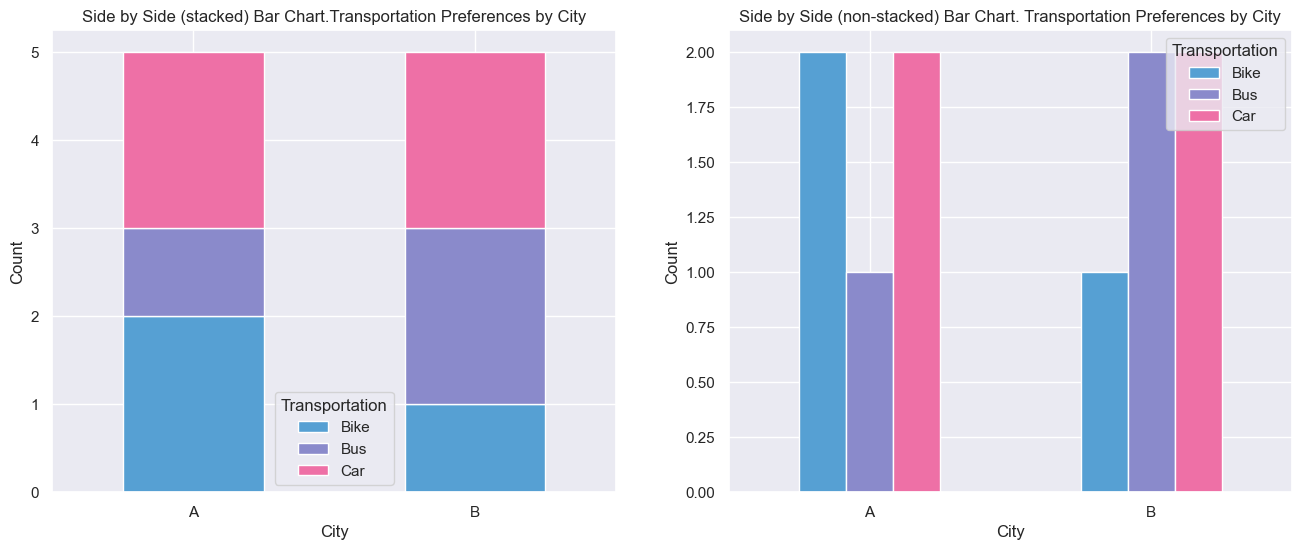

In [11]:
# ----------------------------------------------------------------
# - Contingency table
# ----------------------------------------------------------------

# Create a contingency table
contingency_table = pd.crosstab(df['City'], df['Transportation'])

print('Contingency Table: \n', contingency_table)
print('\n')

# ----------------------------------------------------------------
# - Side by Side Plot the contingency table as a stacked bar plot
# ----------------------------------------------------------------

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
contingency_table.plot(kind='bar',
                       stacked=True,
                       color=['#56a0d3', '#8a8acb', '#ee70a6'],
                       ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

# Set plot labels and title
ax[0].set_xlabel('City')
ax[0].set_ylabel('Count')
ax[0].set_title('Side by Side (stacked) Bar Chart.Transportation Preferences by City')

contingency_table.plot(kind='bar',
                       color=['#56a0d3', '#8a8acb', '#ee70a6'],
                       ax = ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

# Set plot labels and title
ax[1].set_xlabel('City')
ax[1].set_ylabel('Count')
ax[1].set_title('Side by Side (non-stacked) Bar Chart. Transportation Preferences by City')

# Display the legend
plt.legend(title='Transportation', loc='upper right')

# Show the plot
plt.show()

**Numerical Variables**
- **Scatter plot**

In [12]:
# Example 2:

df = pd.read_excel('D:\git\Laboratory\Probability and Statistics\Cross table and scatter plot.xlsx', sheet_name='Scatter plot')

df = df.drop(['Unnamed: 0'], axis = 1)
df = df.iloc[3:]

df.columns = ['Student_ID', 'Reading', 'Writing']
df = df.reset_index(drop = True)

df

,Student_ID,Reading,Writing
0,1,273,216
1,2,292,282
2,3,219,250
3,4,241,217
4,5,284,266
...,...,...,...
99,100,457,521
100,101,499,462
101,102,528,536
102,103,539,549


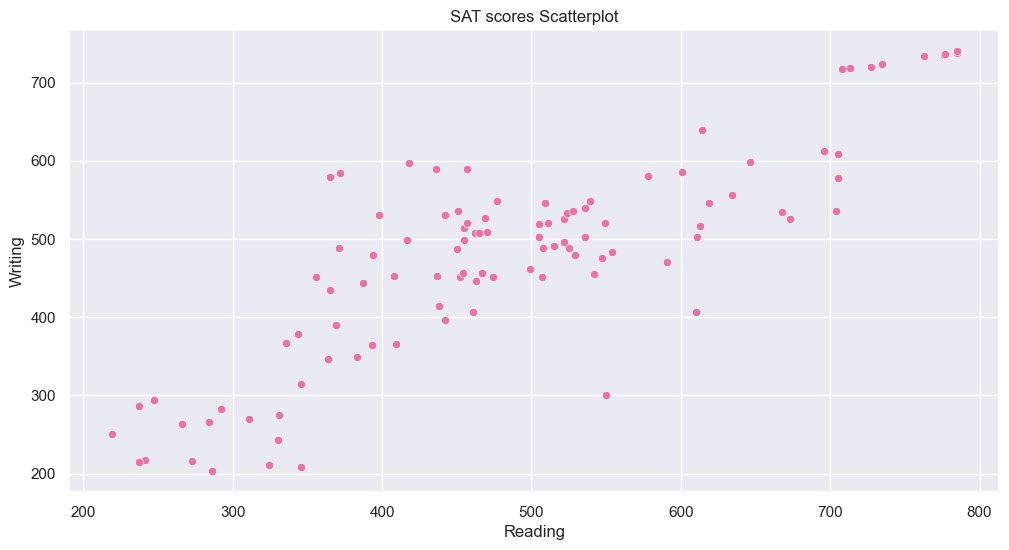

In [13]:
# ----------------------------------------------------------------
# - Scatter plot
# ----------------------------------------------------------------

plt.figure(figsize = (12,6))

sns.scatterplot(x = df['Reading'],
                y = df['Writing'],
                sizes=(20,200),
                color = '#ee70a6')

plt.title('SAT scores Scatterplot')

plt.show()

## 1.6 Measures of Central Tendency

There are **three main measures of central tendency**:
- **Mean**
- **Median**
- **Mode**

However, there are other measures of central tendency too, such as the **harmonic mean**, the **weighted mean** and the **geometric mean**.

**The Arithmetic Mean**
- For the **sample data**: $\overline{x} = \displaystyle\frac{1}{n}\sum_{i=1}^n x_i$
- For the **population data**: $\mu = \displaystyle\frac{1}{N}\sum_{i=1}^N x_i$

where $\sum_{i=1}^n$ is the sum of all values $(x_1, x_2,\ldots, x_n)$, $N$ is the population size, and $n$ is the sample size.


<font color=red>Example 1 </font>: Let us consider the *height* variable of a dataset with information about a sample of students. What is the **mean height of the students** in the sample?
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Central-Tendency/The-Mean/index.html)

In [14]:
# Example 1

df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")
df

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834


In [15]:
# Extract the arithmetic mean for "height"
height_mean = np.mean(df['height'])

print(f'Arithmetic mean for the height of students: {round(height_mean,1)} cm')

Arithmetic mean for the height of students: 171.4 cm


**The Geometric Mean**
The geometric mean is a measure of central tendency that is calculated by multiplying all the values in a set and then taking the n-th root of the product, where $n$ is the number of values.
- To calculate the geometric mean of a sequence of $n$ values $x_1, x_2,\ldots , x_n$ we multiply them and then find the $n-th$ root of this product: $$\overline{x}_{\text{geo}} = \displaystyle\sqrt[n]{x_1\cdot x_2\cdots x_n}$$, which can be rewritten as $$\overline{x}_{\text{geo}} = \displaystyle\sqrt[n]{x_1\cdot x_2\cdots x_n} = \left(\prod_{i=1}^n x_i\right)^{\frac{1}{n}} = \displaystyle\sqrt[n]{\prod_{i=1}^n x_i}$$
- When studying phenomena such as inflation or population changes, which involve periodic increases or decreases (known as rates of change), the geometric mean is more appropriate to find the average change over the entire period under investigation. It is also often used to calculate the average of a set of values that are products or ratios, such as growth rates, investment returns, or other situations where the effect of compounding needs to be considered.
- All values must be non-negative, as the geometric mean involves taking the nth root, and negative values would result in complex numbers.
- The geometric mean tends to be less influenced by extreme values compared to the arithmetic mean.
- It is particularly useful when dealing with ratios or products, where the effects of compounding need to be considered.


<font color=red>Example 2 </font>: We consider the annual growth rates of a swarm of honey bees over a 5-year period. These rates of change are: 14 %, 26 %, 16 %, -38 %, -6 %. Further, we know that at the beginning of the monitoring period there were 5000 bees in the swarm. We are looking for **the mean rate of population change**.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Central-Tendency/The-Mean/index.html)

In [16]:
# Example 2:

bees = np.array([14, 26, 16, -38, -6])         # Variable with the rates of change in %

bees_mean = np.mean(bees)
print(f'The mean rate of population change is {round(bees_mean,1)} percent.')

The mean rate of population change is 2.4 percent.


The arithmetic mean indicates that the swarm is *growing over the period of 5 years*.
To know what is really happening, we calculate **the annual growth of the swarm of bees** explicitely:

In [17]:
# - Transform the given percentages into relative growth rates (annual rates of growth/decline)
bees_growth_rel = 1 + bees/100

# - Calculate the state of the bee population after 5 years
bees_growth_five_years = round(5000 * bees_growth_rel[0] * bees_growth_rel[1] * bees_growth_rel[2] * bees_growth_rel[3] * bees_growth_rel[4])
bees_growth_five_years

4855

We expected the swarm to grow on average over time. However, we calculated *a decline in the absolute number of bees*.
Lets calculate now the geometric mean:

In [18]:
# Via 1: Manually
bees_len = len(bees)  # number of observations
bees_growth_geom = (bees_growth_rel[0] * bees_growth_rel[1] * bees_growth_rel[2] * bees_growth_rel[3] * bees_growth_rel[4]) ** (1 / bees_len)

print(f'Geometric Mean: {round(bees_growth_geom,3)}')

Geometric Mean: 0.994


In [19]:
# Via 2: With scipy
import scipy.stats as stat

bees_growth_geom2 = stat.gmean(bees_growth_rel)

print(f'Geometric Mean: {round(bees_growth_geom2,3)}')

Geometric Mean: 0.994


- The geometric mean indicates that **there is a decline in the number of species over time at an average rate of 0.994, which corresponds to -0.006%**.
- We check that by taking 5,000 bees (the initial number of bees in the swarm) times 0.994 for each year; thus, resulting in 4971 bees after the first year, 4942 after the second year, 4913 after the third year, 4884 after the fourth year and 4855 after the fifth year of observation.
- In contrast to the arithmetic mean, the geometric mean does not over-state the year-to-year growth!

**The Harmonic Mean**
The harmonic mean is a measure of central tendency that is calculated by dividing the number of observations by the reciprocal of each number in the dataset and then taking the reciprocal of the result.
- The formula for calculating the harmonic mean for a set of values $x_1, x_2,\ldots , x_n$ is given by: $$\overline{x}_h = \displaystyle\frac{1}{\left(\frac{1}{x_1} + \frac{1}{x_2} + \ldots + \frac{1}{x_n}\right)}$$ where $n$ is the number of values in the set and $x_1, x_2,\ldots x_n$ are the individual values.
- All values must be non-zero, as the harmonic mean involves division by each value, and division by zero is undefined.
- The harmonic mean tends to be less influenced by extremely large values compared to the arithmetic mean.
- It is particularly useful when dealing with rates, such as speed or efficiency, where individual values represent different parts of a whole.
- It is often used when dealing with rates, ratios, or other situations where the impact of extreme values should be minimized.

<font color=red>Example 3 </font>: The distance from your house to the next lake is 40 km. You drove to the lake at a speed of 20 km per hour and returned home at a speed of 80 km per hour. **What was your average speed for the whole trip?**
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Central-Tendency/The-Mean/index.html)

In [20]:
# Example 3
one_way = 20
back_way = 80

print(f'Arithmetic mean of the two speeds you drove at is {np.mean([one_way,back_way])} km per hour.')

Arithmetic mean of the two speeds you drove at is 50.0 km per hour.


The arithmetic mean of the two speeds is not the correct average speed, since it ignores the fact that you drove 20 km per hour for a much longer time than you drove at 80 km per hour. To find the correct average speed, we must instead calculate the harmonic mean:

In [21]:
# Via 1: Manually
val = np.array([one_way,back_way])
harm_mean = len(val) / np.sum(1 / val)

print(f'Harmonic mean of the two speeds you drove at is {harm_mean} km per hour.')

Harmonic mean of the two speeds you drove at is 32.0 km per hour.


In [22]:
# Via 2: With scipy
import scipy.stats as stat

harm_mean2 = stat.hmean([one_way, back_way])

print(f'Harmonic mean of the two speeds you drove at is {harm_mean2} km per hour.')

Harmonic mean of the two speeds you drove at is 32.0 km per hour.


To verify that the Harmonic mean is the correct results, we do the following reasoning: The distance from the lake to your home is 40 km. So the trip from A to B at a speed of 20 km/h will take 2 hours. The trip from B to A at a speed to 80 km/h will take 0.5 hours. The total time taken for the round distance $2\cdot 40$ km will be 2.5 hours. The **average speed will then be $\frac{80}{2.5} = 32$**

**The Weighted Mean**
The weighted mean is a measure of central tendency that takes into account the importance or "weight" of each data point when calculating the mean.
- The formula for calculating the weighted mean is: $$\overline{x}_w = \displaystyle\frac{\displaystyle \sum_{i=1}^n w_ix_i}{\displaystyle\sum_{i=1}^n w_i}$$ where $n$ is the number of data points, $x_i$ is the value of the $i$-th data point and $w_i$ is the weight assigned to the $i$-th data point. The term $\sum_{i=1}^n w_ix_i$ is obtained by multiplying each data value by its weight and then adding the products.
- Each data point is multiplied by its corresponding weight, and the products are summed.
- The sum of the weights is used as the divisor in the calculation.
- Data points with higher weights contribute more to the final mean.
- It is particularly useful when some data points contribute more to the overall average than others.

<font color=red>Example 4 </font>: To determine the grades of students in a course, an instructor may assign a weight to the final exam that is three times as much as that of the other exams. Find **the weighted mean for a student who scores 45 and 68 on the first two exams and 74 on the final**.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Central-Tendency/The-Mean/index.html)

In [23]:
# Via 1: Manually
weig_mean = np.sum([45 * 1, 68 * 1, 74 * 3]) / np.sum([1, 1, 3])

print(f'Weighted mean for the student: {weig_mean}.')

Weighted mean for the student: 67.0.


In [24]:
# Via 2: With numpy
stud_scores = np.array([45, 68, 74])
stud_weights = np.array([1, 1, 3])

weig_mean2 = np.average(stud_scores, weights=stud_weights)

print(f'Weighted mean for the student: {weig_mean2}.')

Weighted mean for the student: 67.0.


**The Median**
The median is a measure of central tendency that represents the middle value of a dataset when it is ordered from least to greatest. It is less sensitive to extreme values (outliers) compared to the mean, making it a robust statistic.
To find the median:
- **If the dataset has an odd number of observations**:
    1. Arrange the data in ascending order.
    2. The median is the middle value: $\mathbf{\text{Median} = \text{Middle Value}}$
- **If the dataset has an even number of observations**:
    1. Arrange the data in ascending order.
    2. The median is the average of the two middle values: $\mathbf{\text{Median} = \displaystyle\frac{\text{Middle Value}_1 + \text{Middle Value}_2}{2}}$
- The median does not require assumptions about the distribution of the data.
- It is particularly useful when dealing with skewed distributions or datasets with outliers.
- The median is resistant to extreme values because it is not influenced by the actual values of all observations, only the order.

In [25]:
import numpy as np

# Example data
data = np.array([4, 7, 1, 9, 2, 5, 8])

# Calculate the median using NumPy
median = np.median(data)

print("Median:", median)


Median: 5.0


**The Mode**
In statistics, the mode represents the most common value in a data set. Therefore, the mode is the value that occurs with the highest frequency in a data set (Mann 2012). In terms of graphical frequency distribution the mode corresponds to the summit(s) of the graph. Unlike the mean and median, the mode is not necessarily unique; a set of values may have one mode, more than one mode, or no mode at all.
- **Unimodal, Bimodal, and Multimodal**:
    - *Unimodal*: If a set of values has only one mode, it is called unimodal.
    - *Bimodal*: If there are two modes, it is called bimodal.
    - *Multimodal*: If there are more than two modes, it is called multimodal.
- **No Mode**: If no value is repeated, or if all values occur with the same frequency, the set is said to have no mode.
- **Applications**:
    - The mode is commonly used in statistics and data analysis to describe the central tendency of a distribution.
    - It is especially useful for categorical data, where the concept of "average" is not as straightforward as with numerical data.
- **Visual Representation**: In a histogram or frequency distribution, the mode corresponds to the peak or peaks, representing the most frequently occurring value(s).

In [26]:
from scipy import stats
import numpy as np

# Example data
data = np.array([4, 7, 1, 9, 2, 5, 8, 8, 8])

# Calculate mode using scipy.stats.mode
mode_result = stats.mode(data, keepdims=True)

# Access the mode and count
mode_value = mode_result.mode[0]
mode_count = mode_result.count[0]

print(f"Mode: {mode_value}")
print(f"Count: {mode_count}")


Mode: 8
Count: 3


**COMPARISON BETWEEN MEAN, MEDIAN AND MODE**

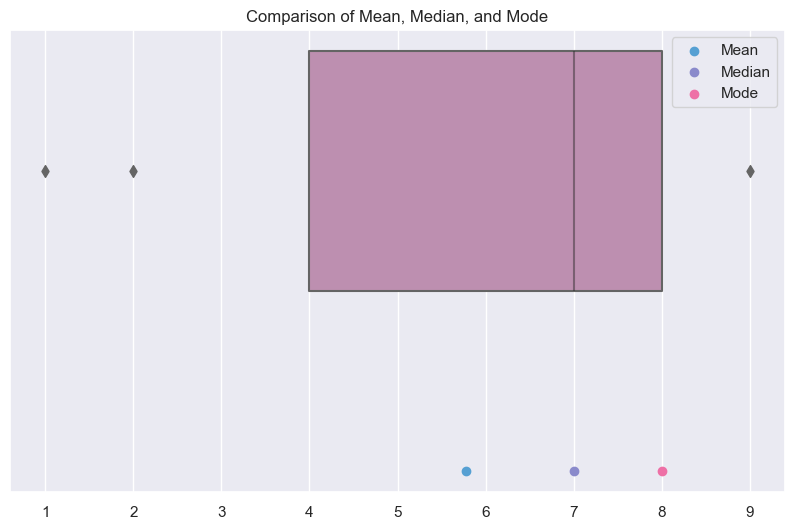

In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Example data
data = np.array([4, 7, 1, 9, 2, 5, 8, 8, 8])

# Calculate mean, median, and mode
mean_value = np.mean(data)
median_value = np.median(data)
mode_value = stats.mode(data, keepdims=True).mode[0]  # Calculate mode using the mode function

plt.figure(figsize=(10,6))
# Create a box plot
sns.boxenplot(x = data,
              color = '#c587b3')

# Plot mean, median, and mode
plt.scatter([mean_value], [1], color='#56a0d3', marker='o', label='Mean')
plt.scatter([median_value], [1], color='#8a8acb', marker='o', label='Median')
plt.scatter([mode_value], [1], color='#ee70a6', marker='o', label='Mode')

# Customize the plot
plt.title('Comparison of Mean, Median, and Mode')
plt.legend()
plt.show()


In [28]:
# Example 1:

df = pd.read_excel('D:\git\Laboratory\Probability and Statistics\Mean, median, mode.xlsx')
df = df[['Unnamed: 0', 'Mean, median and mode', 'Unnamed: 2', 'Unnamed: 3']]

df = df.drop(['Unnamed: 0'], axis = 1)
df = df.iloc[3:]
df.columns = ['Position', 'New_York_City', 'Los_Angeles']
df = df.reset_index(drop = True)

print('Table with the pizza prices in New Yor City and Los Angeles (in $): \n ', df)

Table with the pizza prices in New Yor City and Los Angeles (in $): 
     Position New_York_City Los_Angeles
0         1             1           1
1         2             2           2
2         3             3           3
3         4             3           4
4         5             5           5
5         6             6           6
6         7             7           7
7         8             8           8
8         9             9           9
9        10            11          10
10       11            66         NaN


In [29]:
import scipy.stats as stat
import numpy as np

# The mean price in New York City:
NYC_mean = np.mean(df['New_York_City'])
print(NYC_mean)

# The mean price in Los Angeles:
LA_mean = np.mean(df['Los_Angeles'])
print(LA_mean)

# The median price in New York City:
NYC_median = np.median(df['New_York_City'])
print(NYC_median)

# The median price in Los Angeles:
LA_median = np.median(df['Los_Angeles'])
print(LA_median)

# The mode in New York City:
NYC_mode = stats.mode(df['New_York_City'], keepdims=True).mode[0]
print(NYC_mode)

# The mode in Los Angeles:
LA_mode = stats.mode(df['Los_Angeles'], keepdims=True).mode[0]
print(LA_mode)

11.0
5.5
6.0
6.0
3
1


C:\Users\luthi\AppData\Local\Temp\ipykernel_33940\2372758117.py:21: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  NYC_mode = stats.mode(df['New_York_City'], keepdims=True).mode[0]
C:\Users\luthi\AppData\Local\Temp\ipykernel_33940\2372758117.py:25: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  LA_mode = stats.mode(df['Los_Angeles'], keepdims=True).mode[0]


## 1.7 Measures of Symmetry

### 1.7.1 Skewness

Skewness is a measure of the asymmetry or distortion from the symmetrical bell curve in a set of data. In a Normal distribution, the mean, median, and mode are all equal, and the skewness is zero.
- **Positive Skewness (Right-Skewed)**:
    - The distribution has a long right tail.
    - The mean > the median.
    - The majority of data points are concentrated on the left side of the distribution.
    - The skewness value is positive.
- **Negative Skewness (Left-Skewed)**:
    - The distribution has a long left tail.
    - The mean < the median.
    - The majority of data points are concentrated on the right side of the distribution.
    - The skewness value is negative.
- **Zero Skewness**:
    - The distribution is symmetrical.
    - The mean = median = mode.
    - There is no skewness (skewness value is zero).

The formula for skewness (using the third standardized moment) is given by: $$\text{Skewness} = \displaystyle\frac{\sum_{i=1}^n (X_i - \overline{X})^3/n}{(\sum_{i=1}^n(X_i - \overline{X})^2/n)^{\frac{3}{2}}}$$ where $X_i$ is each individual data point, $\overline{X}$ is the mean and $n$ is the number of data points.

Computing and visualizing the skewness coefficient for the numerical features.

In order to detect skewness in your data, you can deploy the following techniques:

- Data visualization (e.g. visualize with a histogram)
- Calculate the coefficient of asymmetry (aka coefficient of skewness) and kurtosis. In a normal distribution, these indicators are equal to 0. Or use other methods like Kolmogorov-Smirnov, Lilliefors, and Shapiro-Wilk.
- Calculate mean, mode, median and percentiles and compare them (see in the below charts how mode, median and mean vary depending on data skewness)

As a general rule of thumb:

- Data is symmetrical: skewness is between -0.5 and 0.5
- Data is slightly skewed: skewness is between -1 and -0.5 or 0.5 and 1
- Data is highly skewed: skewness is less than -1 or greater than 1.

There are two types of skewness:

- The skewness is positive when you see the tail on the right side of the distribution.
- The skewness is negative when you see the tail on the left side of the distribution.

---

In multivariate regression analysis, assessing the skewness of independent variables and analyzing their correlation with the dependent variable are important steps for several reasons:

1. **Assumption of Normality:** Many statistical methods, including regression analysis, assume that the variables are normally distributed. Skewness is a measure of the asymmetry of the distribution. If a variable is highly skewed, it may violate the assumption of normality. In such cases, transforming the variable (e.g., using logarithmic transformation) may be necessary to achieve normality.

2. **Linear Relationship**: Regression analysis assumes a linear relationship between the independent variables and the dependent variable. Skewed variables may not exhibit a linear relationship effectively. Identifying and transforming skewed variables can help ensure that the linear relationship assumption is met.

3. **Model Interpretability:** Skewed variables can impact the interpretability of the regression coefficients. Transformation of skewed variables can make the relationships more linear and improve the interpretability of the coefficients. Skewed variables may complicate the interpretation of regression coefficients. Transformation of skewed variables can make the model results more interpretable, especially when the relationships are nonlinear.

4. **Multicollinearity:** High correlation among independent variables, known as multicollinearity, can affect the stability and interpretability of regression coefficients. Analyzing the correlation matrix helps identify potential multicollinearity issues. If two variables are highly correlated, it might be redundant to include both in the model. Correlation analysis helps identify the strength and direction of relationships between variables. Understanding the correlation between independent variables and the dependent variable helps in assessing multicollinearity (high correlation between independent variables), which can affect the stability and interpretability of regression coefficients.

5. **Model Performance:** Understanding the relationships between independent variables and the dependent variable is crucial for building an effective regression model. Variables that are strongly correlated with the dependent variable are likely to have a more significant impact on the model's performance.

6. **Outliers:** Skewness analysis can help identify potential outliers in the data. Outliers can have a substantial impact on regression results, and it's important to address them appropriately, such as by transforming the data or applying robust regression techniques. Skewed distributions may indicate the presence of outliers in the data. Outliers can have a significant impact on regression results, affecting coefficients and model performance. Identifying and handling outliers is crucial for accurate regression analysis.

7. **Statistical Tests**: Some statistical tests assume normality, and skewed variables can impact the validity of these tests. Checking the skewness helps decide whether additional statistical tests or transformations are needed.

In summary, assessing skewness and correlation provides insights into the distributional characteristics of the variables and their relationships with the dependent variable. This information is crucial for ensuring that regression assumptions are met, for improving the model's interpretability, and for identifying potential issues like multicollinearity or outliers.


In [30]:
from scipy.stats import skew

# Data 1
data_1 = [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 7]
skewness_1 = skew(data_1)
print('Data 1:')
print('mean = {} > median = {}'.format(np.mean(data_1),np.median(data_1)))
print('Skewness = ',skewness_1)
print('\n')

# Data 2
data_2 = [1, 1, 2, 2, 3, 3, 3, 4,4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7]
skewness_2 = skew(data_2)
print('Data 2:')
print('mean = {} = median = {}'.format(np.mean(data_2),np.median(data_2)))
print('Skewness = ',skewness_2)
print('\n')


# Data 3
data_3 = [1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7]
skewness_3 = skew(data_3)
print('Data 3:')
print('mean = {} < median = {}'.format(np.mean(data_3),np.median(data_3)))
print('Skewness = ',skewness_3)
print('\n')

Data 1:
mean = 2.789473684210526 > median = 2.0
Skewness =  0.9955182978601751


Data 2:
mean = 4.0 = median = 4.0
Skewness =  0.0


Data 3:
mean = 4.9 < median = 5.0
Skewness =  -0.7234932151049145




## 1.8 Measures of Dispersion

### 1.8.1 Variance
The **variance** is a statistical measure that **quantifies the amount of variation or dispersion in a set of data points**. It provides a numerical value to indicate how spread out the values in a dataset are from the mean (average) value. A higher variance indicates greater variability, while a lower variance suggests that the values are more tightly clustered around the mean.
- The variance is the mean squared deviation from the mean. The variance for population data is denoted by $\sigma^2$ and the variance calculated for sample data is denoted by $s^2$. Mathematically it is given by: $$\sigma^2 = \displaystyle\frac{\sum_{i=1}^n(x_i - \mu)^2}{N}$$, respectively $$s^2 = \displaystyle\frac{\sum_{i=1}^n(x_i - \overline{x})^2}{n-1}$$ where: $\sigma^2$ is called the *population variance* and $s^2$ is the *sample variance*, the quantity $x_i-\mu$ respectively $x_i-\overline{x}$ is called the deviation of the $x_i$ value $(x_1,x_2,\ldots,x_n)$ from the mean.
- **Squared Differences**
    - Variance is calculated by taking the average of the squared differences between each data point and the mean.
    - Squaring the differences ensures that negative differences do not cancel out positive differences, emphasizing the magnitude of deviations.

- **Interpretation**:
    - A small variance indicates that most data points are close to the mean, while a large variance suggests that the data points are spread out over a wider range.

In [31]:
import numpy as np

data = [4, 7, 1, 9, 2, 5, 8, 8, 8]
variance = np.var(data)

print(f"Variance: {variance}")

Variance: 7.506172839506173


### 1.8.2 Standard Variation
The **standard deviation** is a statistical measure that quantifies the amount of variation or dispersion in a set of data points. It is closely related to variance, but it **provides a more interpretable measure because it is in the same units as the original data** (not squared). The standard deviation is often used to characterize the spread of data points in a distribution. **The standard deviation is the most common measure of variability for a SINGLE DATASET**.
- The value of the standard deviation tells us how closely the values of a data set are clustered around the mean. In general, a lower value of the standard deviation indicates that the values of the data set are spread over a relatively smaller range around the mean. In contrast, a larger value of the standard deviation for a data set indicates that the values of that data set are spread over a relatively larger range around the mean.
- The formula for calculating the standard deviation ($\sigma$) is the square root of the variance: $$\sigma = \sqrt{\text{Variance}}$$
- **Units of Measurement**:
    - Unlike variance, the standard deviation is expressed in the same units as the original data, making it more interpretable.
- **Interpretation**:
    - A small standard deviation indicates that data points are close to the mean, while a large standard deviation suggests that the data points are spread out over a wider range.
- **Empirical Rule (68-95-99.7 Rule)**:
    - In a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, 95% falls within two standard deviations, and 99.7% falls within three standard deviations.

In [32]:
import numpy as np

data = [4, 7, 1, 9, 2, 5, 8, 8, 8]
std_deviation = np.std(data)

print(f"Standard Deviation: {std_deviation}")

Standard Deviation: 2.739739556875101


<font color=red>Example 1 </font>: Generate normally distributed data with low and high spread around the mean. Create the plot of the data together with the mean line.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Dispersion/Variance-and-Standard-Deviation/index.html)

In [33]:
# Generate random data
n = 50       # sample size
low_sd = np.random.normal(loc=0, scale=0.3, size=n)  # loc = mu, scale = sigma
high_sd = np.random.normal(loc=0, scale=1, size=n)

print(low_sd)
print(high_sd)

[-0.58872287  0.3177585  -0.05282284  0.27468082  0.24466515  0.83385946
 -0.05029493 -0.45005984 -0.19175146  0.4161317  -0.80371695  0.00591943
 -0.49065551 -0.16749283 -0.11482668 -0.24734768 -0.24066393 -0.07159667
 -0.13183762  0.25041564 -0.28595391 -0.26173337 -0.05654118  0.01810309
 -0.18213732 -0.08579169  0.44767271  0.03539104  0.50207667  0.14587464
 -0.11882577  0.04530532  0.44825801  0.18353222 -0.01151932 -0.15298943
  0.30439758 -0.01592257  0.25676562 -0.18426186  0.13733434  0.55065848
 -0.34573339 -0.00889391 -0.40893588 -0.23977037 -0.07587662  0.08510831
  0.01736325  0.20366617]
[-0.80603254  0.49413133 -0.38379672  1.23821845 -0.21218667  0.11453014
  1.44662226 -1.3220423  -1.28747087  1.46859965 -0.3265762   0.08845197
  0.34138599 -0.49357048  0.03541942  0.17174475  1.71830957  0.98282299
  0.90567207  0.57447713 -0.47318133  1.15850634  0.42395544 -1.92579739
 -0.36146181 -1.39510279 -0.03098664 -0.01520898 -0.81898254 -0.29534203
  1.07481942  0.90183892 

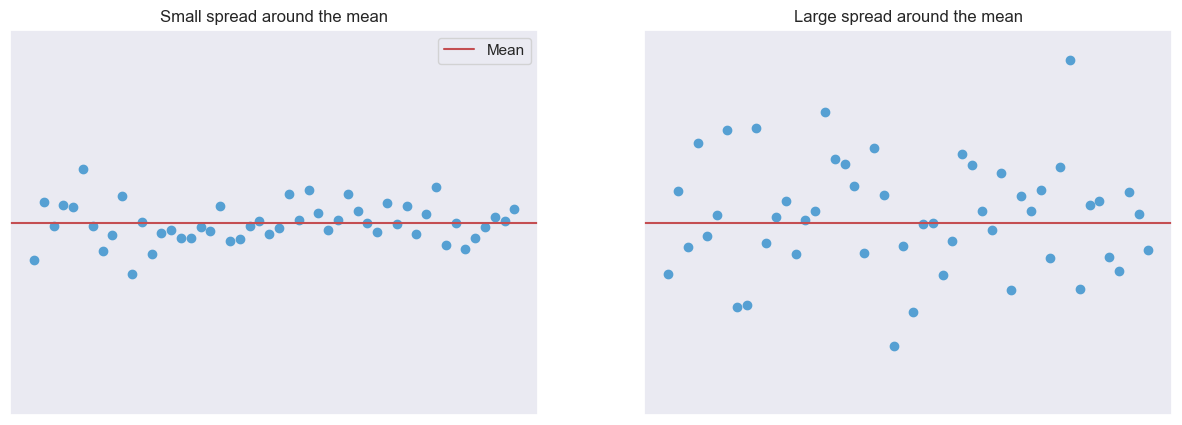

In [34]:
# Generate plot
x_sd = np.arange(0, 1, 1 / (n - 1))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot 1
axs[0].plot(x_sd,
            low_sd,
            linestyle="",
            marker="o",
            color="#56a0d3")
axs[0].axhline(y=0,
               color="r",
               linestyle="-",
               label="Mean")

axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)

axs[0].set_ylim((-3, 3))

axs[0].title.set_text("Small spread around the mean")

axs[0].legend()

# plot 2
axs[1].plot(x_sd,
            high_sd,
            linestyle="",
            marker="o",
            color="#56a0d3")
axs[1].axhline(y=0,
               color="r",
               linestyle="-")

axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)

axs[1].set_ylim((-3, 3))
axs[1].title.set_text("Large spread around the mean")

plt.show()

<font color=red>Example 2 </font>: In the dataset of the students, to compute the mean, median, variance and standard deviation for some numerical variables of interest and present them in a nice format.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Dispersion/Variance-and-Standard-Deviation/index.html)

In [35]:
df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")

# Numerical variables of interest
quant_vars = ['name', 'age', 'nc.score', 'height', 'weight']

df_quant = df[quant_vars]
df_quant.head(10)

,name,age,nc.score,height,weight
1,"Gonzales, Christina",19,1.91,160,64.8
2,"Lozano, T'Hani",19,1.56,172,73.0
3,"Williams, Hanh",22,1.24,168,70.6
4,"Nem, Denzel",19,1.37,183,79.7
5,"Powell, Heather",21,1.46,175,71.4
6,"Perez, Jadrian",19,1.34,189,85.8
7,"Clardy, Anita",21,1.11,156,65.9
8,"Allen, Rebecca Marie",21,2.03,167,65.7
9,"Tracy, Robert",18,1.29,195,94.4
10,"Nimmons, Laura",18,1.19,165,66.0


In [36]:
# mean
df_quant_mean = df_quant.loc[:, df_quant.columns != "name"].apply(np.mean)

# median
df_quant_median = df_quant.loc[:, df_quant.columns != "name"].apply(np.median)

# variance
df_quant_var = df_quant.loc[:, df_quant.columns != "name"].apply(np.var)

# standard deviation
df_quant_sd = df_quant.loc[:, df_quant.columns != "name"].apply(np.std)


# concatenate the vectors and round to 2 digits
df_quant_stats = pd.concat([df_quant_mean, df_quant_median, df_quant_var, df_quant_sd],axis=1).round(2)

# rename column names
df_quant_stats.columns = ["mean", "median", "variance", "standard deviation"]
df_quant_stats

,mean,median,variance,standard deviation
age,22.54,21.00,36.78,6.06
nc.score,2.17,2.04,0.66,0.81
height,171.38,171.00,122.70,11.08
weight,73.00,71.80,74.56,8.63


<font color=red>Example 3 </font>: Use of Standard Deviation (**Chebyshev's theorem**)
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Dispersion/Variance-and-Standard-Deviation/index.html)

**Chebyshev's theorem**: For any number $k$ greater than 1, at least $1 - \frac{1}{k^2}$ of the data values lie within $k$ *standard deviations* of the *mean*.
Chebyshev's theorem gives a lower bound for the area under a curve between two points that are on opposite sides of the *mean* and at the same distance from the *mean*.

By using the *mean* and *standard deviation* we can find the proportion or percentage of the total observations that fall within a given interval around the mean.


In [37]:
# Generate different values for k
k = np.arange(1,4,0.1)

# Calculate the value 1 - (1/k^2) for each k
auc = 1 - (1 / k**2)
auc_percent = np.round(auc * 100, 0)

# Create dataframe with the values generated
df_values = pd.DataFrame(data=zip(k, auc_percent),
                         columns = ['k', 'auc_percent'])

display(df_values)

,k,auc_percent
0,1.0,0.0
1,1.1,17.0
2,1.2,31.0
3,1.3,41.0
4,1.4,49.0
5,1.5,56.0
6,1.6,61.0
7,1.7,65.0
8,1.8,69.0
9,1.9,72.0


In [38]:
import random

# Generate a value of k
random.seed(3)
random_k = random.sample(list(range(2,5)), 1)[0]
percent = round((1 - (1 / random_k**2)) * 100)

random_k

2

If we pick a value for $k$: $k=2$. This means that at least 3% of the data values lie within 2 standard deviations of the mean.

Lets plot Chebyshev's theorem:

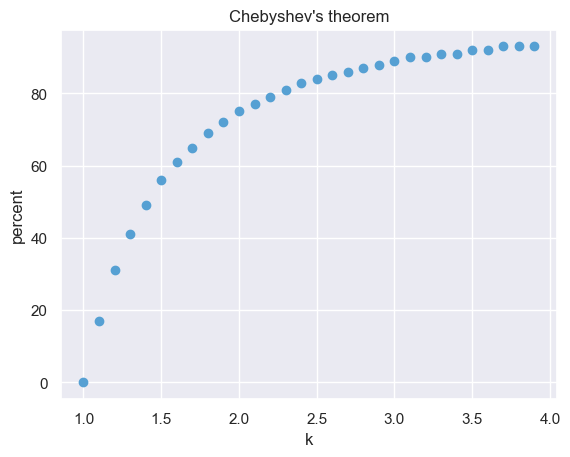

In [39]:
plt.plot(k,
         auc_percent,
         color="#56a0d3",
         linestyle="",
         marker="o")

plt.title("Chebyshev's theorem")
plt.xlabel("k")
plt.ylabel("percent")

plt.show()

The theorem applies to both sample and population data. Note that Chebyshev's theorem is applicable to a distribution of any shape. However, Chebyshev's theorem can be used only for $k>1$. This is so because when $k=1$, the value of $(1−\frac{1}{k^2})$ is zero, and when $k<1$, the value of $(1−\frac{1}{k^2})$ is negative (Mann 2012).

### 1.8.3 Coefficient of Variation
The **coefficient of variation (CV)**, also known as **relative standard deviation** is a normalized measure of the dispersion of a probability distribution. **It is useful when comparing the relative variability of different datasets that may have different units or scales**.
- The coefficient of variation is defined as the ratio of the standard deviation ($\sigma$) to the mean ($\mu$) of a dataset, expressed as a percentage: $$\text{CV} = \displaystyle\left(\frac{\sigma}{\mu}\right)\times 100$$ where $\sigma$ is the standard deviation of the dataset, and $\mu$ is the mean of the dataset.
- **Relative Measure**:
    - The coefficient of variation is a relative measure of variability, making it useful for comparing the dispersion of datasets with different units or scales.
- **Unitless**:
    - Since it is expressed as a percentage, the coefficient of variation is unitless, which facilitates comparisons between datasets.
- **Interpretation**:
    - A low coefficient of variation indicates that the data points are closely clustered around the mean, while a high coefficient of variation suggests that the data points are more spread out relative to the mean.

<font color=red>Example 1 </font>:

In [40]:
# Via 1:
import numpy as np

data = [4, 7, 1, 9, 2, 5, 8, 8, 8]

mean_value = np.mean(data)
std_deviation = np.std(data)

coefficient_of_variation = (std_deviation / mean_value) * 100

print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")


Coefficient of Variation: 47.42%


In [41]:
# Via 2 (with SciPy):
from scipy.stats import variation

data = [4, 7, 1, 9, 2, 5, 8, 8, 8]
coefficient_of_variation = variation(data) * 100

print(f"Coefficient of Variation (SciPy): {coefficient_of_variation:.2f}%")

Coefficient of Variation (SciPy): 47.42%


<font color=red>Example 2 </font>: Taking the prices (in dollars) of pizza at 10 different places in New York, assume we only have mexican pesos, so first we make the conversion, given the exchange rate of 18.81 pesos for one dollar. Then, lets find the standard deviations and the coefficients of variation of these two datasets.

In [42]:
data = {'NY_dollars': [1, 2, 3, 3, 5, 6, 7, 8, 9, 11]}
df = pd.DataFrame(data)
df

,NY_dollars
0,1
1,2
2,3
3,3
4,5
5,6
6,7
7,8
8,9
9,11


In [43]:
# Convert the prices to mexican pesos and add the values to the dataframe
df['MX_pesos'] = df['NY_dollars'] * 18.81
df

,NY_dollars,MX_pesos
0,1,18.81
1,2,37.62
2,3,56.43
3,3,56.43
4,5,94.05
5,6,112.86
6,7,131.67
7,8,150.48
8,9,169.29
9,11,206.91


step 1: Sample or population? --> It is a sample, so we have to use the sample formulas.
step 2: Find the mean

In [44]:
# mean
df_mean = df.loc[:, ['NY_dollars', 'MX_pesos']].apply(np.mean)

# standard deviation
df_sd = df.loc[:, ['NY_dollars', 'MX_pesos']].apply(np.std)

# concatenate the vectors and round to 2 digits
df_stats = pd.concat([df_mean, df_sd],axis=1).round(2)

# rename column names
df_stats.columns = ["mean", "standard deviation"]

df_stats

,mean,standard deviation
NY_dollars,5.50,3.11
MX_pesos,103.46,58.43


Same pizza, same restaurants, but different standard deviations. While there is nothing wrong with the results, we will compute the coefficient of variation for both datasets (dollars and mexican pesos) in order to compare them:

In [45]:
# coefficient of variation
df_stats['CV'] = round((df_stats['standard deviation'] / df_stats['mean']),1)

df_stats

,mean,standard deviation,CV
NY_dollars,5.50,3.11,0.6
MX_pesos,103.46,58.43,0.6


The CV for both datasets is the same and does not have a unit of measurement. Now we can confidently say that the two data sets have the same variability, which was what we expected beforehand.

## 1.9 Measures of Position

A **measure of position** determines the position of a single value in relation to other values in a sample or a population data set. Unlike the mean or the standard deviation, descriptive measures based on quantiles are not sensitive to the influence of a few extreme observations. For this reason, descriptive measures based on quantiles are often preferred over those based on the mean and standard deviation.

### 1.9.1 Quantiles and Percentile rank

- **Quantiles** or **non-central location measures** are cut points dividing the range of the data into contiguous intervals with equal probabilities. Certain quantiles are particularly important:
    - **Quartiles**: Divide the distribution into 4 equal parts. There are 3 quartiles: $Q_1$ (25% accumulated), $Q_2$ (50% accumulated), $Q_3$(75% accumulated).
        - Approximately 25% of the values in a *ranked dataset* are less than $Q_1$ and about 75% are greater than $Q_1$.
        - The second quartile, $Q_2$, divides a *ranked dataset* into two equal parts; hence, the second quartile and the median are the same.
        - Approximately 75% of the data values are less than $Q_3$ and about 25% are greater than $Q_3$.
        - **Interquartile Range**: The difference between the third quartile and the first quartile of a data set is called the interquartile range (IQR) ($\text{IQR} = Q_3 - Q_1$).
    - **Deciles**: Divide the distribution into 10 equal parts. There are 9 deciles: $D_1$ (10% accumulated),$\ldots$, $D_9$ (90% accumulated).
    - **Percentiles**: Divide the distribution into en 100 equal parts. There are 99 percentiles: $P_1$ (1% accumulated),$\ldots$, $P_{99}$ (99% accumulated). The $k^{th}$ percentile is denoted by $P_k$, where $k$ is an integer in the range 1 to 99. For instance, the $25^{th}$ percentile is denoted by $P_{25}$.
        - Thus, the $k^{th}$ percentile, $P_k$, can be defined as a value in a data set such that about $k$% of the measurements are smaller than the value of $P_k$ and about ($100−k$)% of the measurements are greater than the value of $P_k$.
        - The approximate value of the $k^{th}$ percentile, denoted by $P_k$ is $$P_k = \frac{k\cdot n}{100}$$ where $k$ denotes the number of the percentile and $n$ represents the sample size.
        - **Percentile rank**: The percentile rank of $x_i$ gives the percentage of values in the data set that are less than $x_i$. The percentile rank for a particular value $x_i$ of a data set by: $$\text{Percentile rank of }x_i = \frac{\text{Number of values less than }x_i}{\text{Total number of values in the data set}}$$


There is a correspondence between quartiles, deciles and percentiles:
- $Q_1 = P_{25}$, $Q_2 = P_{50} = D_{5} = \text{Median}$, $Q_3 = P_{75}$
- For example $D_4 = P_{40}$


![measures pos](measures_position.png)

[(source)](https://aprendeconalf.es/en/teaching/statistics/manual/descriptive-statistics/)

Quantiles are calculated in a similar way to the median. The only difference lies in the cumulative relative frequency that correspond to every quantile.

![measures pos](cum_rel_freq_measures_pos.png)

[(source)](https://aprendeconalf.es/en/teaching/statistics/manual/descriptive-statistics/)

- **The Five Number Summary**
    - From the three quartiles ($Q_1$,$Q_2$,$Q_3$) we can obtain a measure of center (*the median*, $Q_2$) and *measures of variation* of the two middle quarters of the data, $Q_2−Q_1$ for *the second quarter* and $Q_3 − Q_2$ for *the third quarter*. To know about the variation of the first and fourth quarters, we include the minimum and maximum observations. The variation of *the first quarter* can be measured as the difference between the minimum and the first quartile, $Q_1−\min$. The variation of *the fourth quarter* can be measured as the difference between the third quartile and the maximum, $\max−Q_3$. Thus, the minimum, maximum and quartiles together provide, among other things, information on center and variation (Weiss 2010). The so called **Tukey Five-Number Summary** of a data set consists of the $\min$, $Q_1$, $Q_2$, $Q_3$ and $\max$ of the data set.

<font color=red>Example 1 </font>: Let us consider the dataset with information about a sample of students. First lets subset the data taking only the NC scores and plot a histogram to further inspect the variable's distribution.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/Quartiles-and-Interquartile-Range/index.html)

1       1.91
2       1.56
3       1.24
4       1.37
5       1.46
        ... 
8235    2.91
8236    2.03
8237    3.72
8238    2.74
8239    3.29
Name: nc.score, Length: 8239, dtype: float64


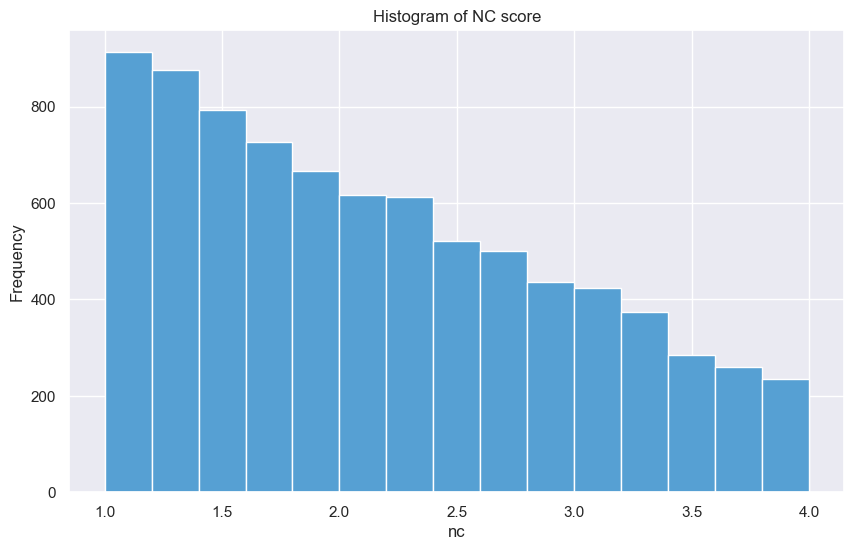

In [46]:
sns.set(style="darkgrid")
# Example 1

df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")

nc_score = df['nc.score']
print(nc_score)

# Histogram of NC Score
plt.figure(figsize= (10,6))
plt.hist(nc_score,
         bins="sturges",
         color="#56a0d3",
         edgecolor="white")

plt.title("Histogram of NC score")
plt.xlabel("nc")
plt.ylabel("Frequency")
plt.show()

In [47]:
import scipy.stats as stats

# Compute the Quartiles for the NC Scores
quartiles = np.percentile(nc_score, [0, 25, 50, 75, 100])
print('Quartiles in NC Scores: ', quartiles)

# Find the Interquartile Range
# via 1
IQR_1 = quartiles[3] - quartiles[1]
print('Interquartile Range (via 1) = ', IQR_1)
# via 2
IQR_2 = stats.iqr(quartiles)
print('Interquartile Range (via 2) = ', IQR_2)

Quartiles in NC Scores:  [1.   1.46 2.04 2.78 4.  ]
Interquartile Range (via 1) =  1.3199999999999998
Interquartile Range (via 2) =  1.3199999999999998


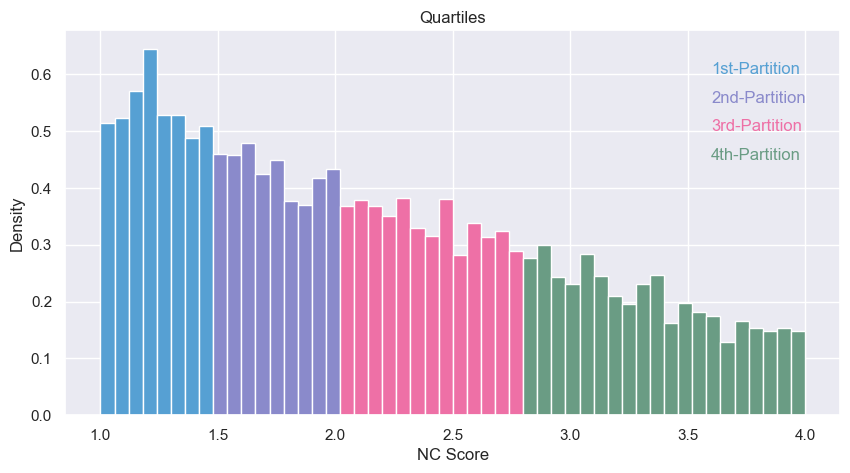

In [48]:
# Plot the Histogram with the partitions of the variable 'nc_score' into quartiles

ax = nc_score.plot.hist(bins=50,
                        density=1,
                        edgecolor="white",
                        figsize=(10, 5))

for bar in ax.containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x < quartiles[0]:
        bar.set_color("#56a0d3")
        bar.set_edgecolor("white")
    elif x < quartiles[1]:
        bar.set_color("#56a0d3")
        bar.set_edgecolor("white")
    elif x < quartiles[2]:
        bar.set_color('#8a8acb')
        bar.set_edgecolor("white")
    elif x < quartiles[3]:
        bar.set_color('#ee70a6')
        bar.set_edgecolor("white")
    elif x < quartiles[4]:
        bar.set_color("#6a9c84")
        bar.set_edgecolor("white")
    else:
        bar.set_color("white")

plt.title("Quartiles")
plt.ylabel("Density")
plt.xlabel("NC Score");

plt.text(3.6, 0.6, "1st-Partition", color="#56a0d3")
plt.text(3.6, 0.55, "2nd-Partition", color="#8a8acb")
plt.text(3.6, 0.5, "3rd-Partition", color="#ee70a6")
plt.text(3.6, 0.45, "4th-Partition", color="#6a9c84")

plt.show()

<font color=red>Example 2 </font>: Let us consider the dataset with information about a sample of students. To calculate the five-number summary for the NC Scores
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/The-Five-Number-Summary/index.html)

In [49]:
import pandas as pd

df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")

nc_score = df['nc.score']
print(nc_score)

1       1.91
2       1.56
3       1.24
4       1.37
5       1.46
        ... 
8235    2.91
8236    2.03
8237    3.72
8238    2.74
8239    3.29
Name: nc.score, Length: 8239, dtype: float64


In [50]:
def fivenum(x):
    """
    Function that computes the five-number summary of a list
    :param x:
    :return:
    """
    series = pd.Series(x)

    mi = series.min()                                                         # min
    q1 = series.quantile(q=0.25, interpolation="nearest")                     # Q_1
    me = series.median()                                                      # Q_2 = median
    q3 = series.quantile(q=0.75, interpolation="nearest")                     # Q_3
    ma = series.max()                                                         # max

    return pd.Series([mi, q1, me, q3, ma], index=["min", "q1", "median", "q3", "max"])

In [51]:
fivenum(nc_score)

min       1.00
q1        1.46
median    2.04
q3        2.78
max       4.00
dtype: float64

<font color=red>Example 3 </font>: Let us consider the dataset with information about a sample of students. To calculate the $38^{th}$, the $50^{th}$ and the $73^{th}$ percentile of the NC Scores.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/Percentiles-and-Percentile-Rank/index.html)

In [52]:
df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")

nc_score = df['nc.score']
print(nc_score)

1       1.91
2       1.56
3       1.24
4       1.37
5       1.46
        ... 
8235    2.91
8236    2.03
8237    3.72
8238    2.74
8239    3.29
Name: nc.score, Length: 8239, dtype: float64


In [53]:
def cal_print_perc(x,k):
    """
    Function that calculate and print the k^th percentile of x
    :param x:
    :return:
    """
    n = len(x)     # set n
    print(f"The {k}th percentile's position is number {round(k * n / 100)}.")

    # select value based on number in the ordered vector
    P_k = x.sort_values()[round((k * n )/ 100)]
    print(f'The value of the {k}th percentile in the ordered vector is {P_k}')


In [54]:
# 38th percentile of NC Score
cal_print_perc(nc_score,38)

The 38th percentile's position is number 3131.
The value of the 38th percentile in the ordered vector is 1.66


In [55]:
# 50th percentile of NC Score
cal_print_perc(nc_score,50)

The 50th percentile's position is number 4120.
The value of the 50th percentile in the ordered vector is 1.78


In [56]:
# 73th percentile of NC Score
cal_print_perc(nc_score,73)

The 73th percentile's position is number 6014.
The value of the 73th percentile in the ordered vector is 1.61


In [57]:
# Using np.percentile()
np.percentile(nc_score, [38, 50, 73])


array([1.74, 2.04, 2.71])

<font color=red>Example 4 </font>: Calculate the percentile rank for a NC score of 2.5.
[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/Percentiles-and-Percentile-Rank/index.html)

In [58]:
# Calculate the percentile rank
stats.percentileofscore(nc_score, 2.5)

66.39762107051827

### 1.9.2 Outliers and Boxplots

**Outliers**
In data analysis the identification of outliers, meaning observations that fall well outside the overall pattern of the data, is very important. An outlier requires special attention. It may be the result of a measurement or recording error, an observation from a different population or an unusual extreme observation. Note that an extreme observation does not need to be an outlier; it can instead be an indication of skewness.

If we observe an outlier, we should try to determine its cause:
- If an outlier is caused by a measurement or recording error or if for some other reason it clearly does not belong to the data set, the outlier can simply be removed.
- If no explanation for an outlier is apparent, the decision whether to retain it in the data set is a difficult judgment call.

As a diagnostic tool for spotting observations that may be outliers we may use quartiles and the *Interquartile range (IQR)*: $$\text{IQR} = Q_3 - Q_1$$ For this we define the *lower limit* and the *upper limit* of a data set: $$\begin{eqnarray*}
% \nonumber to remove numbering (before each equation)
  \text{Lower limit} &=& Q_1 - 1.5\times \text{IQR} \\
  \text{Upper limit} &=& Q_3 + 1.5\times \text{IQR}
\end{eqnarray*}$$
**Observations that lie below the lower limit or above the upper limit are potential outliers.**

---
**BoxPlot**
A boxplot, also called a **box-and-whisker diagram**, is based on the *five-number summary* and can be **used to provide a graphical display of the center and variation of a data set**.

- Box-and-whisker plots give a graphic representation of data using five measures: the median, the first quartile, the third quartile as well as the smallest and the largest value between the lower and the upper limits of the data set.
- The spacing between the different parts of the box indicates the degree of dispersion (spread) and skewness in the data.
- We can compare different distributions by making box-and-whisker plots for each of them.
- Boxplots also helps to detect outliers.

![boxplot](boxplot.png)

[(source)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/Outliers-and-Boxplots/index.html)

- The edges of the box are always the first and third quartile, and the band inside the box is always the second quartile (the median).
- The lines extending from the boxes (whiskers) indicate the variability outside the upper and lower quartile.
- To construct a boxplot, we also need the concept of *adjacent values*. The *adjacent values* of a data set are the most extreme observations that still lie within the lower and upper limits; i.e. they are the most extreme observations that are not potential outliers.
- Outliers may be plotted as individual points.
- If a data set has no potential outliers, the adjacent values are just the minimum and maximum observations

<font color=red>Example 1 </font>: Construct some relevant boxplots in order to analyze the students data set in more depth.
1. Boxplot for the `nc.score` variable

[(source here)](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Position/Outliers-and-Boxplots/index.html)

In [60]:
import pandas as pd

df = pd.read_csv("D:\git\Laboratory\Probability and Statistics\students.csv")

nc_score = df['nc.score']
print(nc_score)

1       1.91
2       1.56
3       1.24
4       1.37
5       1.46
        ... 
8235    2.91
8236    2.03
8237    3.72
8238    2.74
8239    3.29
Name: nc.score, Length: 8239, dtype: float64


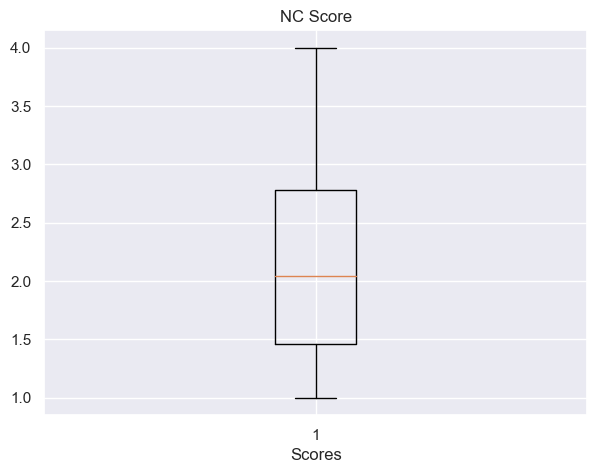

In [78]:
fig = plt.figure(figsize=(7, 5))
plt.boxplot(nc_score
             # = '#56a0d3',
                )
plt.title("NC Score")
plt.xlabel("Scores")
plt.show()

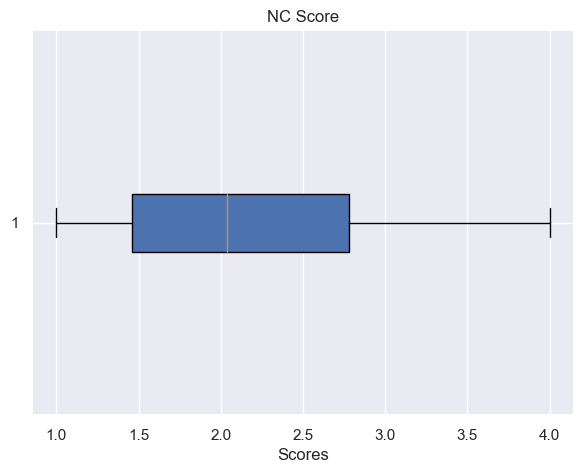

In [81]:
# Boxplot using vert = 0 and filled
fig = plt.figure(figsize=(7, 5))
plt.boxplot(nc_score,
            vert = 0,                  # the boxes will be drawn horizontally
            patch_artist = True        # the boxes will be filled
                )
plt.title("NC Score")
plt.xlabel("Scores")
plt.show()

2. Plot a boxplot of the `nc.score` variable conditioned on the `semester` variable.

<Figure size 700x500 with 0 Axes>

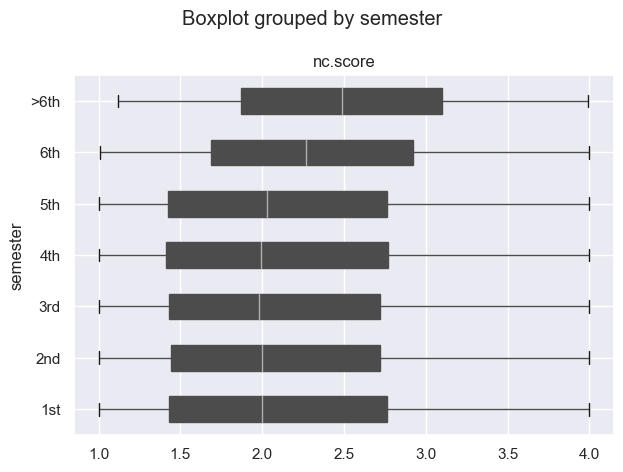

In [82]:
fig = plt.figure(figsize=(7, 5))

df.boxplot(column=["nc.score"],
           by="semester",
           patch_artist=True,
           vert=0)

plt.tight_layout()
plt.show();

The plot suggests that students of higher semesters (> 5th) tend to score higher on the NC. Or, in other words, those students who finish their studies within the minimum period of study (4 semesters) tend to have a lower NC score.

3. We want to know whether gender has any effect on the NC score.

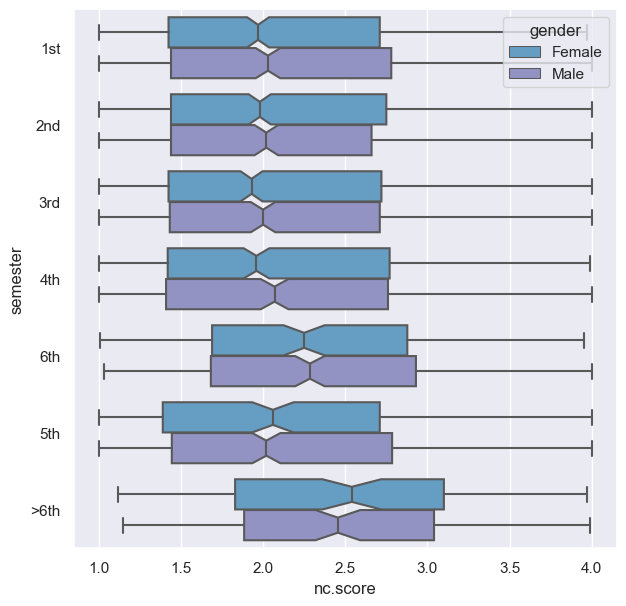

In [84]:
fig = plt.figure(figsize=(7, 7))

sns.boxplot(y = "semester",
            x = "nc.score",
            data = df,
            palette=['#56a0d3', '#8a8acb'],
            hue = 'gender',
            orient = 'h',
            notch = True)

plt.show();

The impact of `gender` on the NC scores is not as clear. We will have to apply methods of **inferential statistics** to assess whether these differences are statistically significant or whether these fluctuations around the median may also be caused solely by chance.

4. Construct the boxplots of the variable `hight` against the variable `gender`.

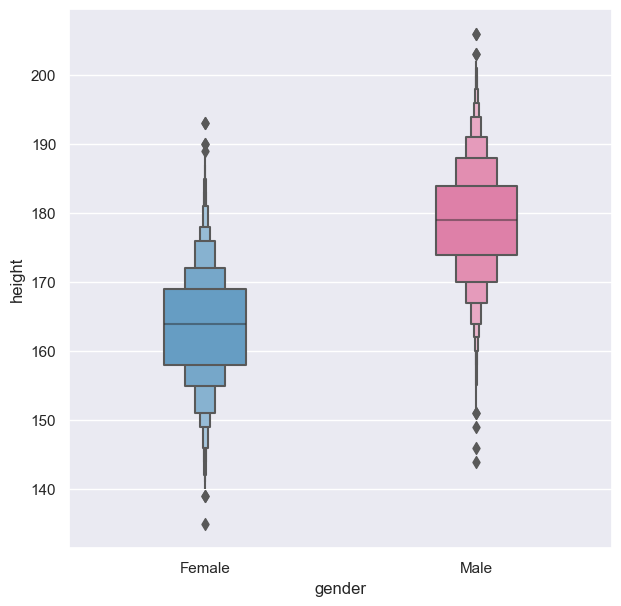

In [86]:
fig = plt.figure(figsize=(7, 7))
sns.boxenplot(x = 'gender',
              y = 'height',
              data = df,
              palette = ['#56a0d3', '#ee70a6'],
              width=0.3)
plt.show();

As is expected, there is a difference in the height of the students among the different groups (male or female). Female students tend to be smaller than male students, but, if we look at the extremes, there are tall and short individuals in both groups.

## 1.10 Measures of Association

If we examine the relationship between two variables, we refer to it as **bivariate statistics**. If the relationships among several variables are simultaneously examined, we refer to it as **multivariate statistics**. **Measures of relation** provide means of summarizing the relation between two variables.

### 1.10.1 Covariance

The **covariance** is a statistical measure that quantifies the degree to which two variables change together. In other words, it measures the extent to which a change in one variable corresponds to a change in another. It is a measure of the joint variability of two random variables.

The formula for the covariance between two variables X and Y, with observations indexed by i, is given by: $$\text{cov}(X,Y) = \displaystyle\frac{\displaystyle\sum_{i=1}^n(X_i - \overline{X})(Y_i - \overline{Y})}{n-1}$$ where
- $\text{cov}(X,Y)$ is the covariance between the variables $X$ and $Y$.
- $X_i$ and $Y_i$ are the individual observations of variables $X$ and $Y$.
- $\overline{X}$ and $\overline{Y}$ are the means of the variables $X$ and $Y$, respectively.
- $n$ is the number of observations.

**Interpretation**
- *Positive covariance*: Indicates that as one variable increases, the other variable tends to increase as well.
- *Negative covariance*: Indicates that as one variable increases, the other variable tends to decrease.
- *Zero covariance*: Indicates no linear relationship between the variables.

**Limitation**
However, the covariance value alone is not easily interpretable in terms of the strength or direction of the relationship. It is affected by the scale of the variables, making comparisons difficult. To address this, the correlation coefficient is often used, which is a standardized measure of the strength and direction of the linear relationship between two variables.

<font color=red>Example 1 </font>:

In [87]:
import numpy as np

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Calculate covariance matrix
cov_matrix = np.cov(x, y)

# Extract the covariance between x and y from the matrix
cov_xy = cov_matrix[0, 1]

print("Covariance matrix:")
print(cov_matrix)
print(f"Covariance between x and y: {cov_xy}")


Covariance matrix:
[[ 2.5 -2.5]
 [-2.5  2.5]]
Covariance between x and y: -2.5


<font color=red>Example 2 </font>: In real state, given the size and price of a sample of houses stated in the data set.
1. Represent the data in a scatter plot
2. Compute the covariance of the variables `Size_ft` and `Price_$`.

[(source here)](https://learn.365datascience.com/courses/statistics/covariance/)

In [88]:
data = {'Size_ft': [650, 785, 1200, 720, 975],
        'Price_$': [772, 998, 1200, 800, 895]}

df = pd.DataFrame(data)
df

,Size_ft,Price_$
0,650,772
1,785,998
2,1200,1200
3,720,800
4,975,895


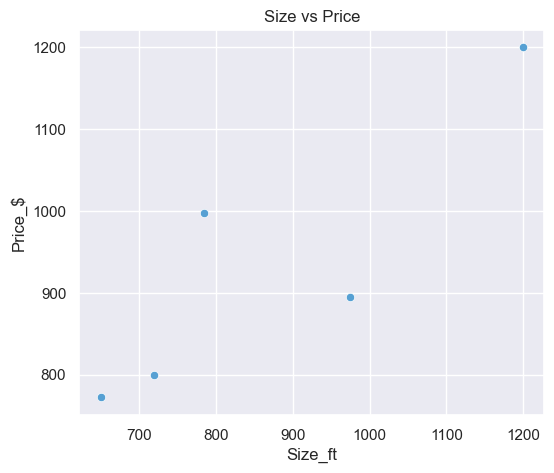

In [91]:
plt.figure(figsize = (6,5))

sns.scatterplot(x = df['Size_ft'],
                y = df['Price_$'],
                sizes=(20,200),
                color = '#56a0d3')

plt.title('Size vs Price')

plt.show();

In [94]:
# Calculate covariance matrix
cov_matrix = np.cov(df['Size_ft'], df['Price_$'])

# Extract the covariance between x and y from the matrix
cov_xy = cov_matrix[0, 1]

print(f"Covariance between Size and Price: {cov_xy}")

Covariance between Size and Price: 33491.25


The covariance between the Size and the Price is **positive**. Therefore, as expected the Size of a house determine the price of the house in a direct way.
However, there is a problem with covariance. It could be any number between $[-\infty, \infty]$ so a value of a completely different scale. Therefore it is impossible to give an interpretation to the covariance value

### 1.10.2 Correlation

<div style="color:white; background-color:  #008075; padding: 14px;">
<center>
<b>
INFERENTIAL STATISTICS </b>
</center>
</div>

Inferential statistics consists of methods that use sample results to make decisions or predictions about an underlying population (Mann 2012, Weiss 2010)